The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

### medv
median value of owner-occupied homes in \$1000s.

### crim
per capita crime rate by town.

### zn
proportion of residential land zoned for lots over 25,000 sq.ft.

### indus
proportion of non-retail business acres per town.

### chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

### nox
nitrogen oxides concentration (parts per 10 million).

### rm
average number of rooms per dwelling.

### age
proportion of owner-occupied units built prior to 1940.

### dis
weighted mean of distances to five Boston employment centres.

### rad
index of accessibility to radial highways.

### tax
full-value property-tax rate per \$10,000.

### ptratio
pupil-teacher ratio by town.

### black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

### lstat
lower status of the population (percent).



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [9]:
housing_df = pd.read_csv(r"Boston.csv")
housing_df_continuous = housing_df.drop(["zn", "chas", "rad"], axis=1)

In [10]:
housing_df.head()

,medv,crime rate,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [12]:
housing_df_continuous.head()

,medv,crime rate,indus,nox,rm,age,dis,tax,ptratio,black,lstat
0,24.0,0.00632,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98
1,21.6,0.02731,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14
2,34.7,0.02729,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03
3,33.4,0.03237,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94
4,36.2,0.06905,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33


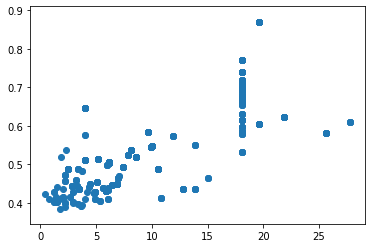

In [4]:

plt.scatter(housing_df[["indus"]], housing_df[["nox"]])

,medv,crime rate,indus,nox,rm,age,dis,tax,ptratio,black,lstat
medv,1.000000,-0.388305,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.468536,-0.507787,0.333461,-0.737663
crime rate,-0.388305,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,-0.385064,0.455621
indus,-0.483725,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800
nox,-0.427321,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879
rm,0.695360,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808
age,-0.376955,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339
dis,0.249929,-0.379670,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996
tax,-0.468536,0.582764,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993
ptratio,-0.507787,0.289946,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044
black,0.333461,-0.385064,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.441808,-0.177383,1.000000,-0.366087


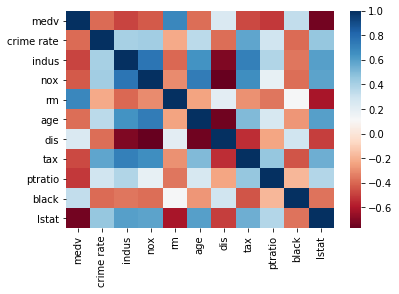

In [13]:
corr = housing_df_continuous.corr()
display(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

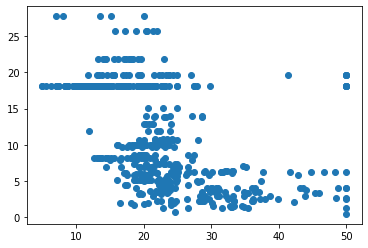

In [55]:
plt.scatter(housing_df_continuous[["medv"]], housing_df_continuous[["indus"]])

In [74]:
medv = housing_df_continuous[["medv"]]

In [75]:
medv

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [76]:
# kmeans structure in skl
km = KMeans(n_clusters=2)
km.fit(housing_df_continuous[["medv"]], housing_df_continuous[["indus"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [77]:
centroids = km.cluster_centers_
labels = km.labels_
centroids

array([[18.7705    ],
       [36.73018868]])